# Business Problem 
It is important to understand our main objective which is to develop a model that can assess the sentiment of tweets solely based on their content. To address this, we’re using a dataset from CrowdFlower, which includes more than 9,000 tweets about Apple and Google products. These tweets have been labeled by human raters as positive, negative, or neutral, providing a foundation for a Natural Language Processing (NLP) approach to classify sentiment accurately.

In [1]:
import pandas as pd
import nltk
import re                                  
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from PIL import Image
from nltk.collocations import *

In [2]:
df = pd.read_csv('clean_df.csv')
df.head()

,Original Tweet,Product,Emotion,Brand,Clean Tweet,Character Count of Original Tweet,Hashtag,Hashtag Count,Character Count of Clean Tweet,Clean Tokens,Clean Token Count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,i have a g iphone after hrs tweeting at risea...,127,"['#RISE_Austin', '#SXSW']",2,127,"['i', 'have', 'g', 'iphone', 'after', 'hrs', '...",16
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipadiphone app that youll ...,139,['#SXSW'],1,139,"['know', 'about', 'awesome', 'ipadiphone', 'ap...",15
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale t...,79,"['#iPad', '#SXSW']",2,79,"['can', 'not', 'wait', 'ipad', 'also', 'they',...",11
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,i hope this years festival isnt as crashy as ...,82,['#sxsw'],1,82,"['i', 'hope', 'years', 'festival', 'isnt', 'as...",12
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google ...,131,['#SXSW'],1,131,"['great', 'stuff', 'fri', 'sxsw', 'marissa', '...",14


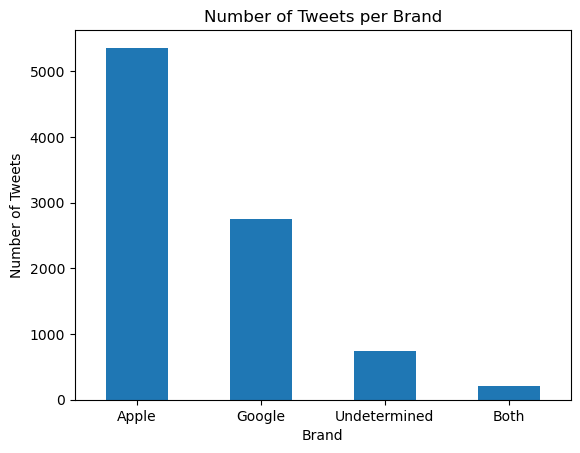

In [3]:
df['Brand'].value_counts().plot(kind='bar')
plt.title('Number of Tweets per Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

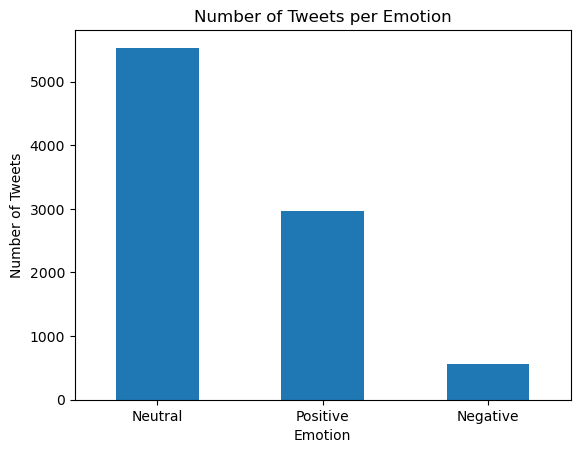

In [4]:
df['Emotion'].value_counts().plot(kind='bar')
plt.title('Number of Tweets per Emotion')
plt.xlabel('Emotion')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

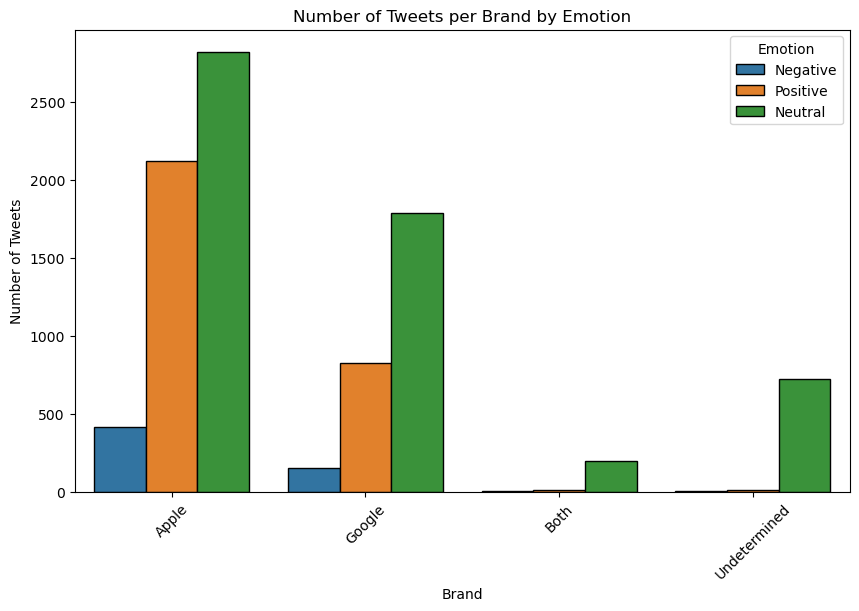

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Brand', hue='Emotion', edgecolor='black')
plt.title('Number of Tweets per Brand by Emotion')
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.show()

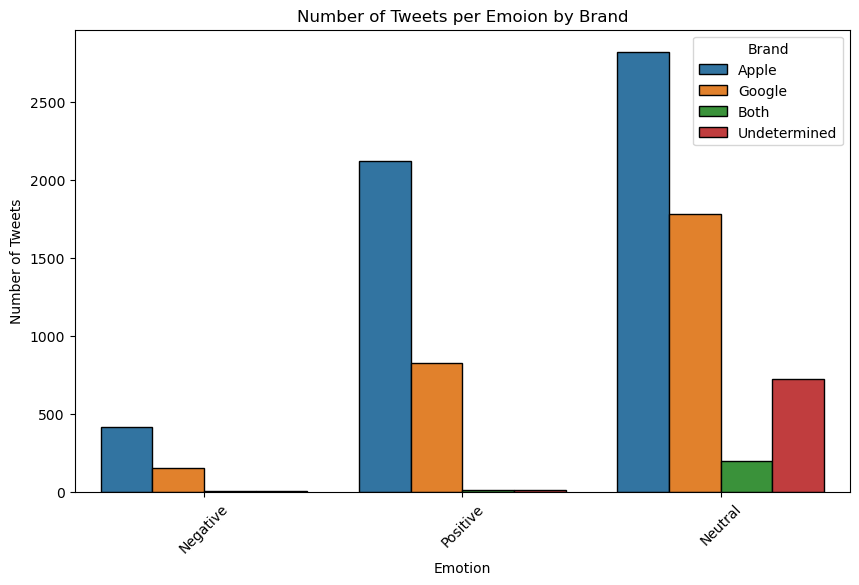

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Emotion', hue='Brand', edgecolor='black')
plt.title('Number of Tweets per Emoion by Brand')
plt.xlabel('Emotion')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()

In [7]:
df.columns

Index(['Original Tweet', 'Product', 'Emotion', 'Brand', 'Clean Tweet',
       'Character Count of Original Tweet', 'Hashtag', 'Hashtag Count',
       'Character Count of Clean Tweet', 'Clean Tokens', 'Clean Token Count'],
      dtype='object')

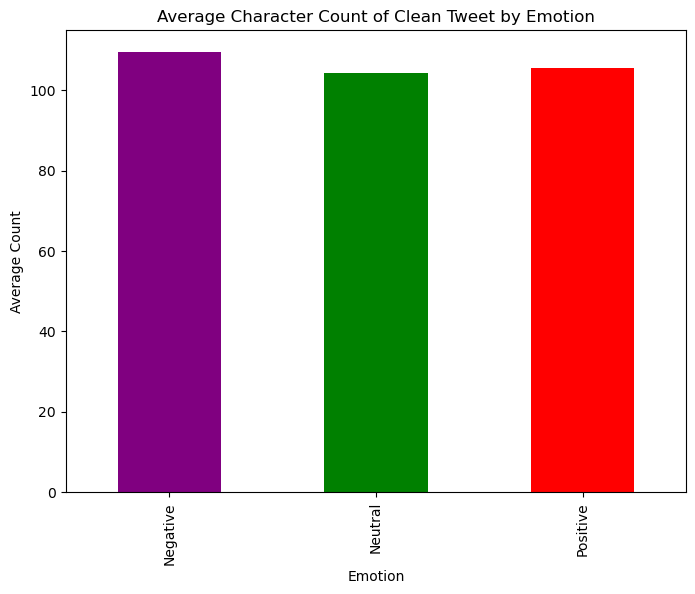

In [8]:
plt.figure(figsize = (8, 6))
df.groupby(['Emotion'])['Character Count of Clean Tweet'].mean().plot.bar(color=['purple','green','red']);
plt.ylabel('Average Count')
plt.title('Average Character Count of Clean Tweet by Emotion')
plt.show()

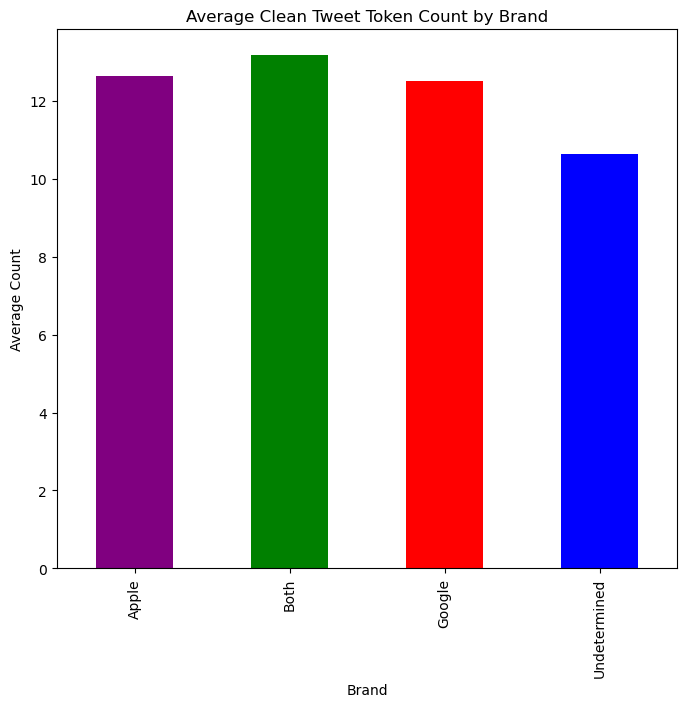

In [9]:
plt.figure(figsize = (8, 7))
df.groupby(['Brand'])['Clean Token Count'].mean().plot.bar(color=['purple','green','red','blue']);
plt.ylabel('Average Count')
plt.title('Average Clean Tweet Token Count by Brand')
plt.show()

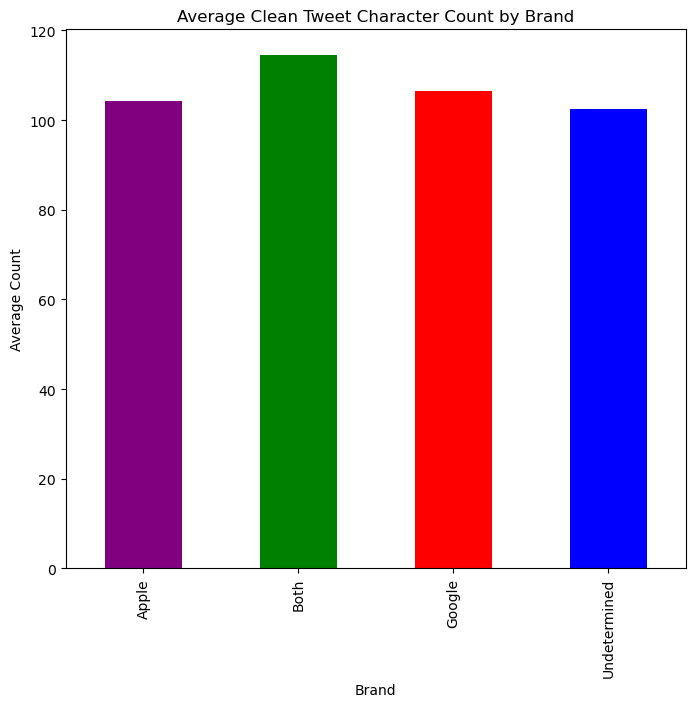

In [10]:
plt.figure(figsize = (8, 7))
df.groupby(['Brand'])['Character Count of Clean Tweet'].mean().plot.bar(color=['purple','green','red','blue']);
plt.ylabel('Average Count')
plt.title('Average Clean Tweet Character Count by Brand')
plt.show()

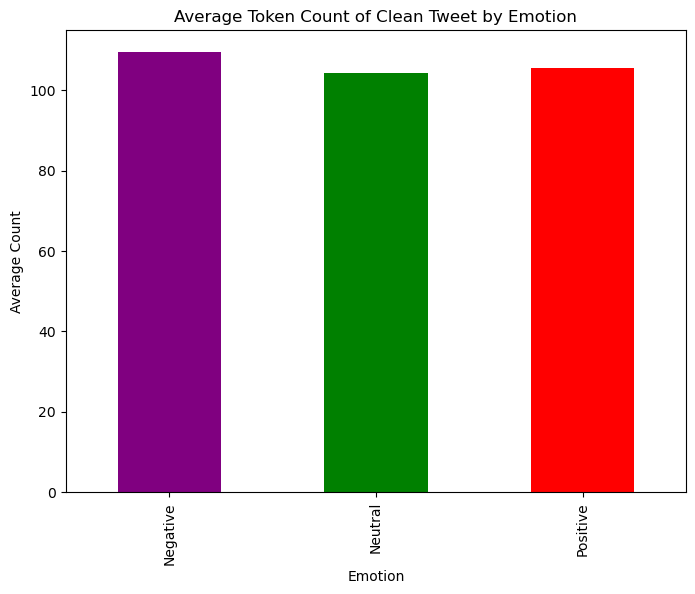

In [11]:
plt.figure(figsize = (8, 6))
df.groupby(['Emotion'])['Character Count of Clean Tweet'].mean().plot.bar(color=['purple','green','red']);
plt.ylabel('Average Count')
plt.title('Average Token Count of Clean Tweet by Emotion')
plt.show()

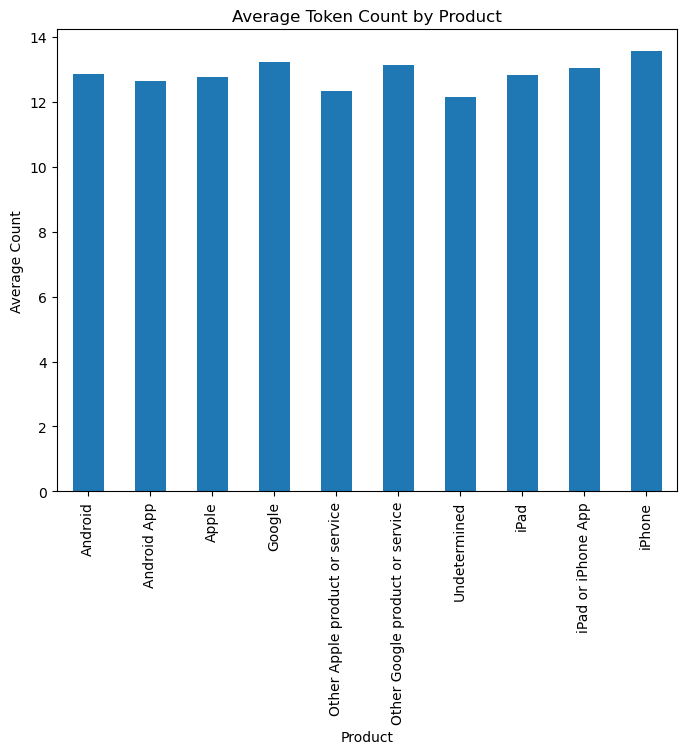

In [12]:
plt.figure(figsize = (8, 6))
df.groupby(['Product'])['Clean Token Count'].mean().plot.bar();
plt.ylabel('Average Count')
plt.title('Average Token Count by Product')
plt.xticks(rotation = 90)
plt.show()

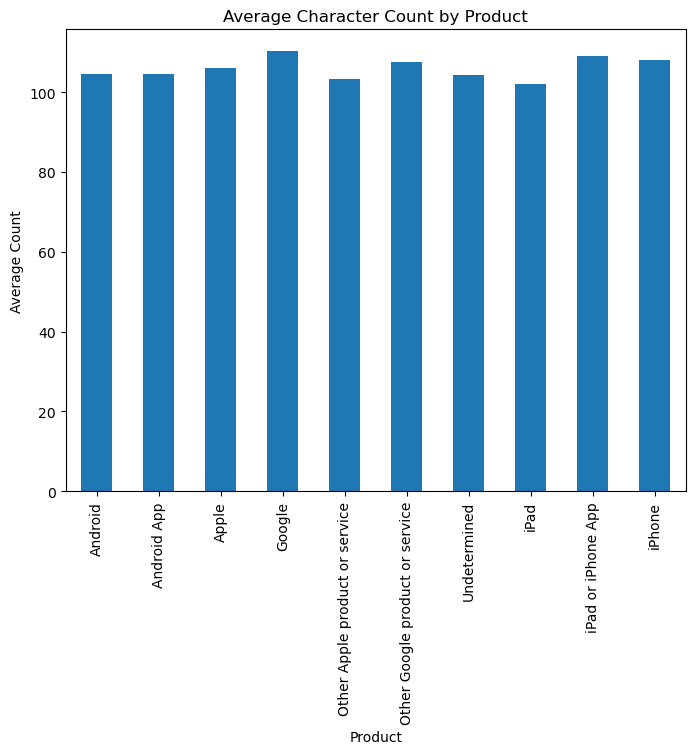

In [13]:
plt.figure(figsize = (8, 6))
df.groupby(['Product'])['Character Count of Clean Tweet'].mean().plot.bar();
plt.ylabel('Average Count')
plt.title('Average Character Count by Product')
plt.xticks(rotation = 90)
plt.show()

In [14]:
ListOfHashtags = df['Hashtag'].to_list()
RawHashBag = ','.join(map(str, ListOfHashtags))
RawHashTokens = word_tokenize(RawHashBag)

hashstops = (list(string.punctuation) + ['“','”','...',"''",'’','``',"'",',','#','[',']'])

def remove_hashstops(bag, stopwords = hashstops): 
    stops_removed = [word.lower() for word in bag if word.lower() not in stopwords] 
    return stops_removed 

CleanHashTokens = remove_hashstops(RawHashTokens)

frequency = FreqDist(CleanHashTokens)
frequency.most_common(25)

[('sxsw', 9092),
 ('apple', 416),
 ('google', 321),
 ('sxswi', 316),
 ('ipad2', 296),
 ('iphone', 265),
 ('ipad', 264),
 ('android', 131),
 ('austin', 112),
 ('circles', 98),
 ('tech', 87),
 ('ubersocial', 68),
 ('gsdm', 64),
 ('japan', 58),
 ('tapworthy', 54),
 ('fb', 52),
 ('qagb', 50),
 ('infektd', 48),
 ('winning', 44),
 ('uxdes', 40),
 ('edchat', 37),
 ('itunes', 37),
 ('musedchat', 34),
 ('newtwitter', 33),
 ('mashable', 33)]

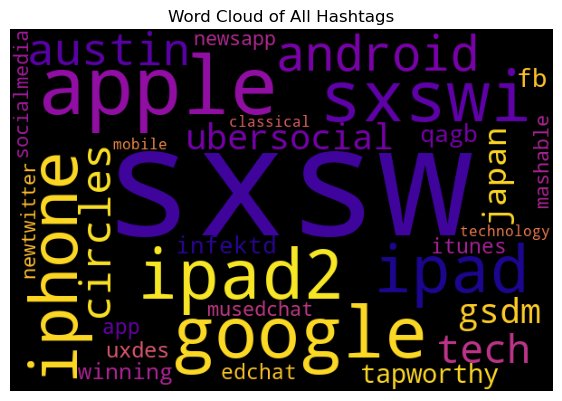

In [15]:
wordcloud = WordCloud(stopwords = None, collocations = False, width = 600, height = 400, 
                      min_font_size = 16, background_color = 'black', colormap = 'plasma') 
wordcloud.generate(",".join((CleanHashTokens))) 

plt.figure(figsize = (7, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of All Hashtags');

## Spliting Tweets

In [16]:
df.columns

Index(['Original Tweet', 'Product', 'Emotion', 'Brand', 'Clean Tweet',
       'Character Count of Original Tweet', 'Hashtag', 'Hashtag Count',
       'Character Count of Clean Tweet', 'Clean Tokens', 'Clean Token Count'],
      dtype='object')

In [17]:
new_stopwords = ['a', 'am', 'an', 'and', 'at', 'be', 'for', 'from', 'if', 
                 'in', 'it', "it's", 'its', 'itself', 'my', 'of', 'on', 'or', 'rt', 'sxsw', 
                 'that', 'the', 'their', 'theirs', 'these', 'this', 'those', 'to']

new_stopwords.extend(hashstops)

def remove_stopwords(text):
    return [word for word in word_tokenize(text) if not word in new_stopwords]

df['Cleaned Tokens'] = df['Clean Tweet'].apply(lambda x: remove_stopwords(x))

In [18]:
df.head()

,Original Tweet,Product,Emotion,Brand,Clean Tweet,Character Count of Original Tweet,Hashtag,Hashtag Count,Character Count of Clean Tweet,Clean Tokens,Clean Token Count,Cleaned Tokens
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,i have a g iphone after hrs tweeting at risea...,127,"['#RISE_Austin', '#SXSW']",2,127,"['i', 'have', 'g', 'iphone', 'after', 'hrs', '...",16,"[i, have, g, iphone, after, hrs, tweeting, ris..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipadiphone app that youll ...,139,['#SXSW'],1,139,"['know', 'about', 'awesome', 'ipadiphone', 'ap...",15,"[know, about, awesome, ipadiphone, app, youll,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale t...,79,"['#iPad', '#SXSW']",2,79,"['can', 'not', 'wait', 'ipad', 'also', 'they',...",11,"[can, not, wait, ipad, also, they, should, sal..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,i hope this years festival isnt as crashy as ...,82,['#sxsw'],1,82,"['i', 'hope', 'years', 'festival', 'isnt', 'as...",12,"[i, hope, years, festival, isnt, as, crashy, a..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google ...,131,['#SXSW'],1,131,"['great', 'stuff', 'fri', 'sxsw', 'marissa', '...",14,"[great, stuff, fri, marissa, mayer, google, ti..."


In [19]:
Pos_DF = df['Cleaned Tokens'].loc[df['Emotion'] == 'Positive'] 
Neg_DF = df['Cleaned Tokens'].loc[df['Emotion'] == 'Negative'] 
Neu_DF = df['Cleaned Tokens'].loc[df['Emotion'] == 'Neutral'] 
Apple_DF = df['Cleaned Tokens'].loc[df['Brand'] == 'Apple'] 
Google_DF = df['Cleaned Tokens'].loc[df['Brand'] == 'Google']
Both_DF = df['Cleaned Tokens'].loc[df['Brand'] == 'Both']
Undet_DF = df['Cleaned Tokens'].loc[df['Brand'] == 'Undetermined'] 

tokens = [] 
tokens_pos = [] 
tokens_neg = [] 
tokens_neu = []
tokens_app = [] 
tokens_goo = [] 
tokens_both = []
tokens_und = []

for row in df['Cleaned Tokens']:
    tokens.extend(row) 
for row in Pos_DF:
    tokens_pos.extend(row) 
for row in Neg_DF:
    tokens_neg.extend(row) 
for row in Neu_DF:
    tokens_neu.extend(row) 
for row in Apple_DF:
    tokens_app.extend(row) 
for row in Google_DF:
    tokens_goo.extend(row)
for row in Both_DF:
    tokens_both.extend(row) 
for row in Undet_DF:
    tokens_und.extend(row) 


In [20]:
Corpus_FreqDist = FreqDist(tokens) 
Pos_FreqDist = FreqDist(tokens_pos) 
Neg_FreqDist = FreqDist(tokens_neg) 
Neu_FreqDist = FreqDist(tokens_neu) 

print('Top 25 Used Terms in Positive Tweets:') 
print(Pos_FreqDist.most_common(25)) 
print('') 
print('Top 25 Used Terms in Neutral Tweets:') 
print(Neu_FreqDist.most_common(25))
print('') 
print('Top 25 Used Terms in Negative Tweets:') 
print(Neg_FreqDist.most_common(25)) 

Top 25 Used Terms in Positive Tweets:
[('ipad', 1206), ('apple', 878), ('google', 660), ('is', 643), ('store', 540), ('iphone', 526), ('i', 433), ('app', 396), ('new', 359), ('up', 304), ('with', 295), ('you', 294), ('austin', 290), ('just', 239), ('popup', 227), ('android', 196), ('out', 189), ('by', 172), ('have', 164), ('launch', 160), ('get', 158), ('are', 157), ('your', 146), ('so', 145), ('now', 141)]

Top 25 Used Terms in Neutral Tweets:
[('google', 1593), ('ipad', 1500), ('apple', 1215), ('is', 905), ('store', 888), ('iphone', 841), ('new', 680), ('austin', 641), ('you', 583), ('i', 539), ('with', 512), ('circles', 508), ('up', 492), ('social', 487), ('launch', 464), ('today', 431), ('popup', 388), ('app', 360), ('network', 355), ('android', 349), ('are', 332), ('not', 321), ('by', 316), ('your', 308), ('out', 299)]

Top 25 Used Terms in Negative Tweets:
[('ipad', 197), ('is', 159), ('iphone', 156), ('google', 147), ('i', 139), ('apple', 109), ('not', 80), ('app', 60), ('with',

## Positive Tweets - Word cloud

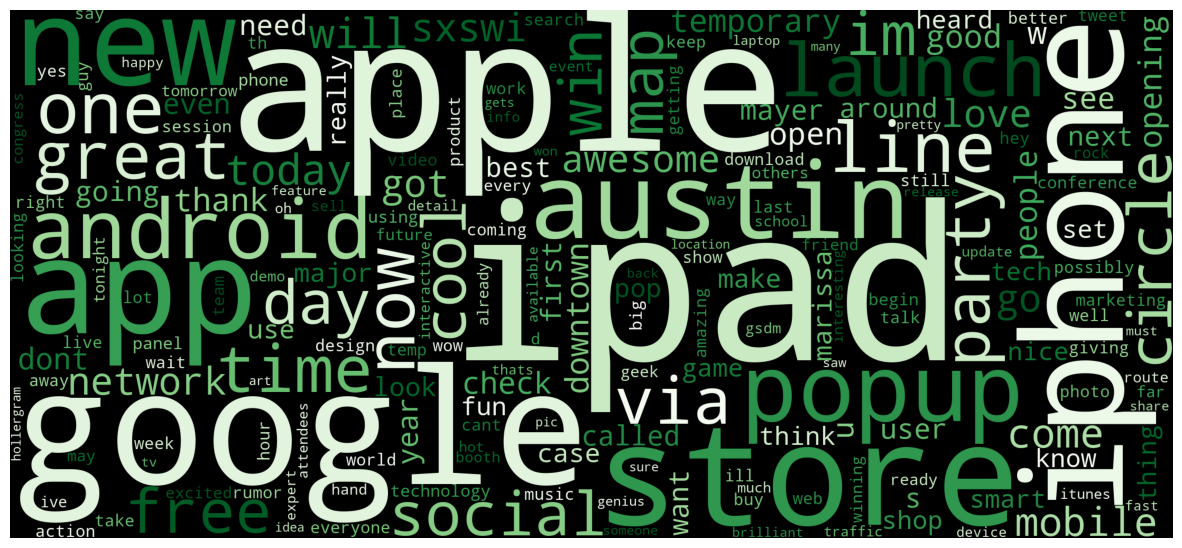

In [21]:
def make_wordcloud(tokens, colormap): 
    plt.figure(figsize=(15, 10))

    wc = WordCloud(max_words=200, stopwords=None, collocations=False, width=2200, 
                   height=1000, colormap=colormap).generate(" ".join(tokens))

    plt.imshow(wc)
    plt.axis('off')

make_wordcloud(tokens_pos, 'Greens')

## Neutral Tweets - Word cloud

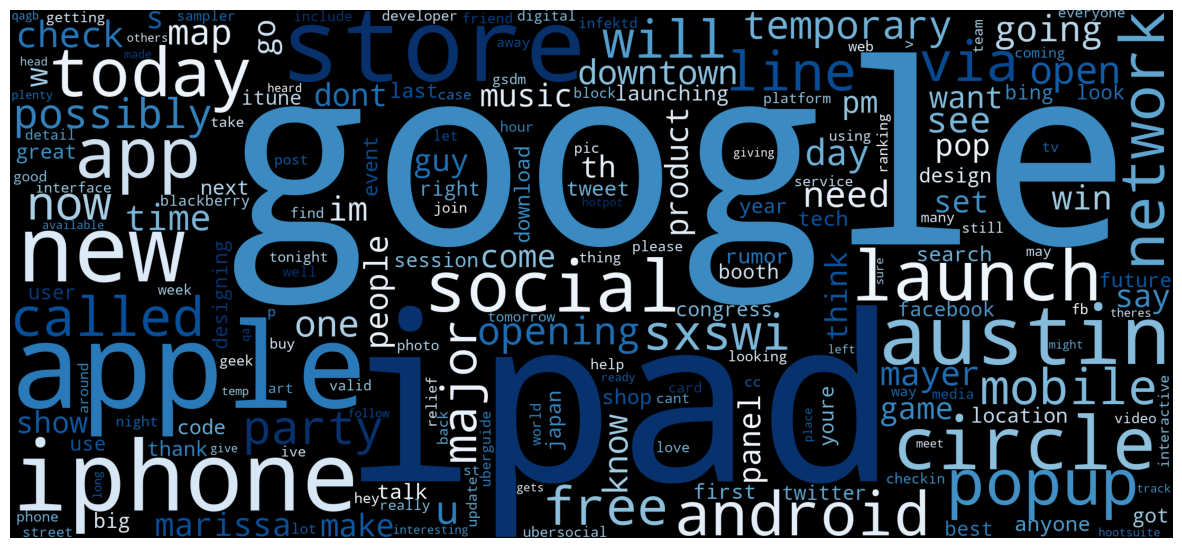

In [22]:
make_wordcloud(tokens_neu, 'Blues')

## Negative Tweets - Word cloud

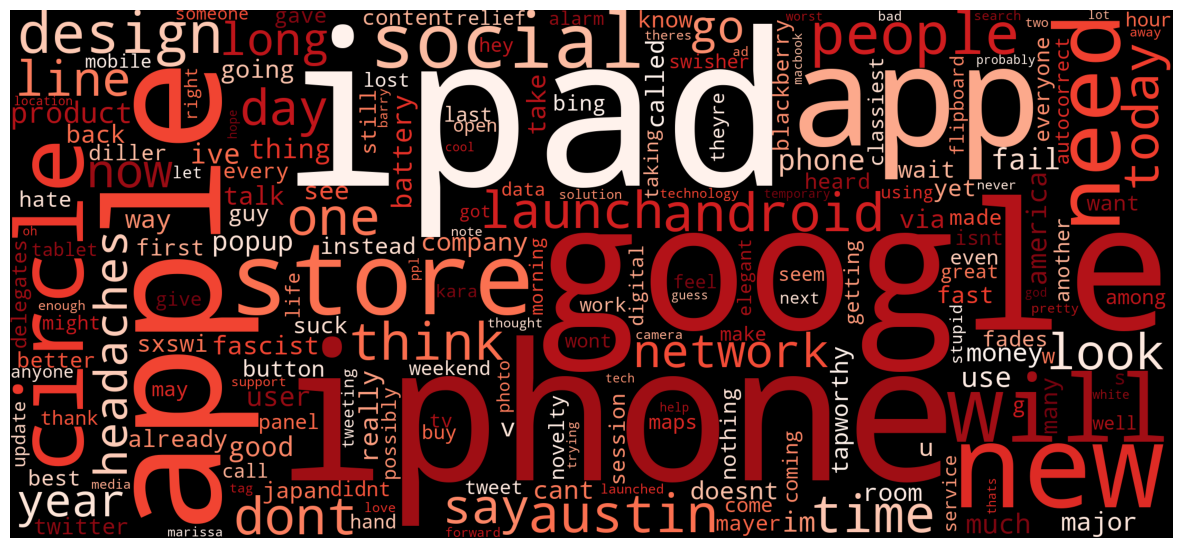

In [23]:
make_wordcloud(tokens_neg, 'Reds')